In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [79]:
# read csv files for city and ride data
city_file=os.path.join("Pyber","generated_data","city_data.csv")
ride_file=os.path.join("Pyber","generated_data","ride_data.csv")
city_df=pd.read_csv(city_file)
ride_df=pd.read_csv(ride_file)
# merge data based on city 
merged_data=ride_df.merge(city_df,how="inner", on= "city")
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405,19,Urban
1,Karenfurt,2017-01-01 05:30:46,22.47,18848561829,19,Urban
2,Karenfurt,2017-01-02 21:58:48,4.73,7929949609958,19,Urban
3,Karenfurt,2017-01-01 03:36:42,21.65,2940464578531,19,Urban
4,Karenfurt,2017-01-03 04:34:51,34.87,2170143080929,19,Urban


In [80]:
#bubble plot number of rides per city 
ride_average_merged_data=merged_data.groupby(["city","type"]).mean()

del ride_average_merged_data["ride_id"]
del ride_average_merged_data["driver_count"]
ride_average_merged_data=ride_average_merged_data.reset_index()
ride_average_merged_data=ride_average_merged_data.merge(city_df, how="right", on="city")
del ride_average_merged_data["type_y"]
ride_average_merged_data=ride_average_merged_data.rename(columns={"type_x":"type"})
ride_average_merged_data=ride_average_merged_data.set_index("city","type")
ride_average_merged_data.head()

,type,fare,driver_count
city,,,
Adamschester,Suburban,29.594444,27
Alexisfort,Urban,27.366970,24
Amberberg,Suburban,28.624375,13
Anthonyfurt,Suburban,29.491176,17
Boyleberg,Suburban,32.396000,13


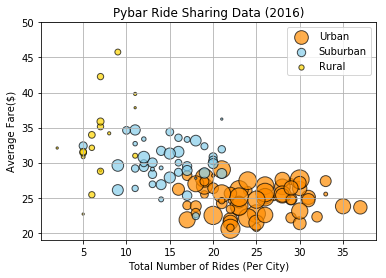

In [81]:
#get number of rides per city and add to data frame ride_average_merged_data
total_number_rides_city=merged_data["city"].value_counts()
# turn value count series into data frame and name columns correctly
total_number_rides_city_df=total_number_rides_city.to_frame()
total_number_rides_city_df=total_number_rides_city_df.reset_index()
total_number_rides_city_df=total_number_rides_city_df.rename(columns={"city":"Total_Rides","index":"city"})
#get total ride data  
ride_average_merged_data=ride_average_merged_data.reset_index()
ride_average_total_ride_df=ride_average_merged_data.merge(total_number_rides_city_df, on="city", how="inner")
ride_average_total_ride_plot=ride_average_total_ride_df
#locate data for each city type using .loc
Urban=ride_average_total_ride_plot.loc[(ride_average_total_ride_plot["type"]=="Urban")&(ride_average_total_ride_plot["city"])]
Suburban=ride_average_total_ride_plot.loc[(ride_average_total_ride_plot["type"]=="Suburban")&(ride_average_total_ride_plot["city"])]
Rural=ride_average_total_ride_plot.loc[(ride_average_total_ride_plot["type"]=="Rural")&(ride_average_total_ride_plot["city"])]
#plot the data on scatter plot
plt.scatter(Urban["Total_Rides"],Urban["fare"],s=Urban["driver_count"]*5,c="darkorange",alpha=0.7,edgecolors="black", label="Urban")
plt.scatter(Suburban["Total_Rides"],Suburban["fare"],s=Suburban["driver_count"]*5,c="skyblue",alpha=0.7,edgecolors="black", label="Suburban")
plt.scatter(Rural["Total_Rides"],Rural["fare"],s=Rural["driver_count"]*5,c="gold",alpha=0.7,edgecolors="black", label="Rural")
plt.title("Pybar Ride Sharing Data (2016)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylim(19,50)
plt.legend()
plt.grid()
plt.show()

#Size of points in scatter plot(Pybar Ride Sharing Data(2016)) are related to number of drives in per city

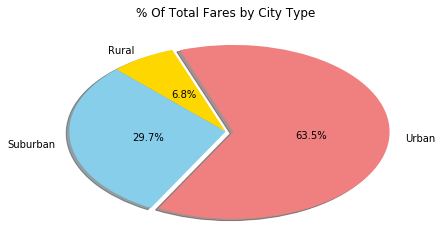

In [82]:

# % of total fares per city type, get data
city_sum_merged_data=merged_data.groupby(["type"]).sum()
del city_sum_merged_data["driver_count"]
del city_sum_merged_data["ride_id"]

total_fares=round(city_sum_merged_data["fare"].sum(),2)
city_sum_merged_data["% Of Total Fares"]=round((city_sum_merged_data["fare"]/total_fares*100),2)
del city_sum_merged_data["fare"]
#plot data on pie graph
colors=np.where(city_sum_merged_data.index=="Urban","lightcoral","-")
colors[city_sum_merged_data.index=="Suburban"]="skyblue"
colors[city_sum_merged_data.index=="Rural"]="gold"
explode=(0,0,0.05)
city_sum_merged_data.plot(kind="pie", y="% Of Total Fares", figsize=(7,4), colors=colors,
                          explode=explode,pctdistance=0.5,startangle=110,
                          autopct='%1.1f%%', shadow=True, legend=False)
plt.title("% Of Total Fares by City Type")
plt.ylabel("")                       
plt.show()



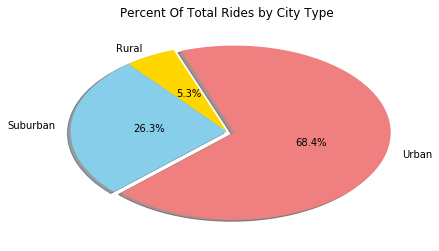

In [83]:
#% total rides on city type
total_rides_type_df=ride_average_total_ride_df.groupby(["type"]).sum()
del total_rides_type_df["driver_count"]

del total_rides_type_df["fare"]
total_rides_all_type=total_rides_type_df["Total_Rides"].sum()
total_rides_type_df["% Of Rides"]=round(total_rides_type_df["Total_Rides"]/total_rides_all_type*100,1)
colors=np.where(total_rides_type_df.index=="Urban","lightcoral","-")
colors[total_rides_type_df.index=="Suburban"]="skyblue"
colors[total_rides_type_df.index=="Rural"]="gold"
explode=(0,0,0.05)
total_rides_type_df.plot(kind="pie", y="% Of Rides", figsize=(7,4), colors=colors,
                          explode=explode,pctdistance=0.5,startangle=110, 
                         autopct='%1.1f%%',shadow=True,legend=False)
plt.title("Percent Of Total Rides by City Type")
plt.ylabel("")                       
plt.show()


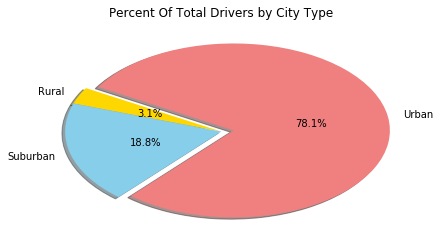

In [84]:
#% of total drivers on city type 
total_drivers_df=ride_average_merged_data.groupby(["type"]).sum()
del total_drivers_df["fare"]
total_drivers_all_types=total_drivers_df["driver_count"].sum()
total_drivers_df["% Of Drivers"]=round(total_drivers_df["driver_count"]/total_drivers_all_types*100,2)

colors=np.where(total_drivers_df.index=="Urban","lightcoral","-")
colors[total_drivers_df.index=="Suburban"]="skyblue"
colors[total_drivers_df.index=="Rural"]="gold"
explode=(0,0,0.08)
total_drivers_df.plot(kind="pie", y="% Of Drivers", figsize=(7,4), colors=colors,
                          explode=explode,pctdistance=0.5,startangle=150,
                      autopct='%1.1f%%',shadow=True,legend=False)
plt.title("Percent Of Total Drivers by City Type")
plt.ylabel("")                       
plt.show()

